### Встановіть необхідні бібліотеки, такі як pandas, numpy, scikit-learn, matplotlib, та seaborn.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sea

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
   accuracy_score, precision_score, recall_score, f1_score,
   confusion_matrix, roc_curve, auc
)

##### Завантажте набір даних Titanic з Kaggle або використайте вбудовані дані Titanic з бібліотеки seaborn.
##### Виведіть перші 10 рядків набору даних. Отримайте базову статистику за допомогою методу describe() та дослідіть пропущені значення.


In [3]:
df = sea.load_dataset("titanic") 
print("Перші 10 рядків датасету:")
display(df.head(10))
print("\nОписові статистики (numeric):")
display(df.describe())
print("\nОпис (всі колонки):")
display(df.describe(include='all'))

Перші 10 рядків датасету:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False



Описові статистики (numeric):


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Опис (всі колонки):


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Попередня обробка даних:
##### Визначте та обробіть пропущені значення:
##### У змінній Age заповніть пропуски середнім значенням.
##### У змінній Embarked заповніть пропуски найбільш поширеним значенням (модою).
##### Закодуйте категоріальні змінні:
##### Використайте One-Hot Encoding для змінних Sex та Embarked.
##### Створіть нові ознаки:
##### Додайте змінну FamilySize, яка буде сумою SibSp та Parch.

In [4]:
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True, dtype=int)
df['familysize'] = df['sibsp'].fillna(0) + df['parch'].fillna(0)
df = df.drop(columns=[c for c in ['name','ticket','cabin','deck','embark_town','who','adult_male','alive','class','alone'] if c in df.columns])
display(df.head(10))

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,familysize
0,0,3,22.000000,1,0,7.2500,1,0,1,1
1,1,1,38.000000,1,0,71.2833,0,0,0,1
2,1,3,26.000000,0,0,7.9250,0,0,1,0
3,1,1,35.000000,1,0,53.1000,0,0,1,1
4,0,3,35.000000,0,0,8.0500,1,0,1,0
5,0,3,29.699118,0,0,8.4583,1,1,0,0
6,0,1,54.000000,0,0,51.8625,1,0,1,0
7,0,3,2.000000,3,1,21.0750,1,0,1,4
8,1,3,27.000000,0,2,11.1333,0,0,1,2
9,1,2,14.000000,1,0,30.0708,0,0,0,1


##### Розділіть набір даних на тренувальну (80%) та тестову (20%) вибірки, використовуючи train_test_split() з бібліотеки scikit-learn.

In [5]:
y = df['survived'].astype(int)
X = df.drop(columns=['survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##### Реалізуйте наступні моделі для бінарної класифікації:
##### Логістична регресія. Приклад використання.  Scikit-learn документація 
##### Дерева рішень. Приклад використання. Scikit-learn документація 
##### Випадкові ліси (Random Forest). Приклад використання. Scikit-learn документація 


In [6]:
models = {
   "Logistic Regression": LogisticRegression(max_iter=1000),
   "Decision Tree": DecisionTreeClassifier(random_state=42),
   "Random Forest": RandomForestClassifier(random_state=42)
}

##### Для кожної моделі виконайте: Тренування на тренувальній вибірці. Передбачення на тестовій вибірці. Оцінку метрик: точність (accuracy), precision, recall, F1-score.


In [9]:
results = []

for name, model in models.items():
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   y_prob = model.predict_proba(X_test)[:,1]
   
   metrics = {
      "Model": name,
      "Accuracy": accuracy_score(y_test, y_pred),
      "Precision": precision_score(y_test, y_pred),
      "Recall": recall_score(y_test, y_pred),
      "F1": f1_score(y_test, y_pred),
      "AUC": auc(*roc_curve(y_test, y_prob)[:2])
   }
   results.append(metrics)

pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.804469,0.793103,0.666667,0.724409,0.844137
1,Decision Tree,0.770950,0.705882,0.695652,0.700730,0.740909
2,Random Forest,0.810056,0.769231,0.724638,0.746269,0.836495


##### Побудуйте матрицю плутанини для кожної моделі. Виведіть ROC-криву та AUC для кожної моделі, використовуючи методи roc_curve() та auc().


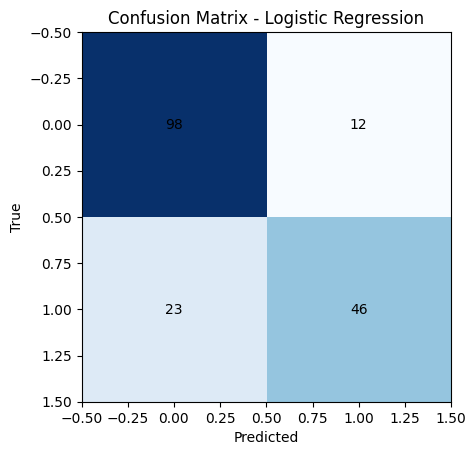

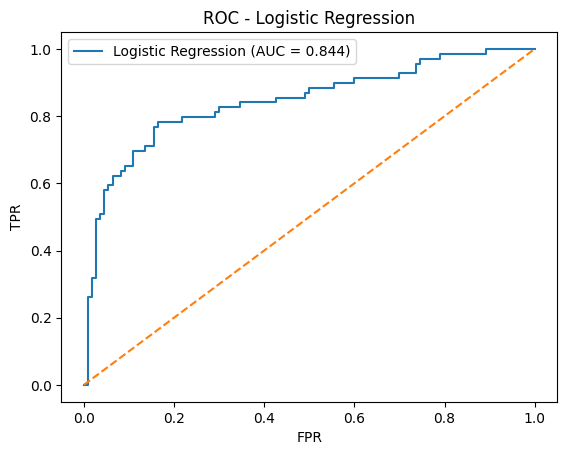

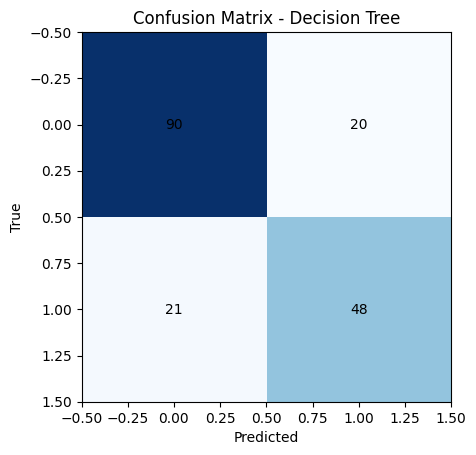

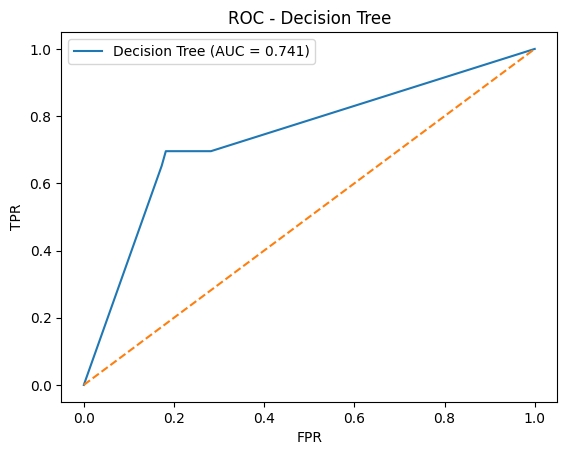

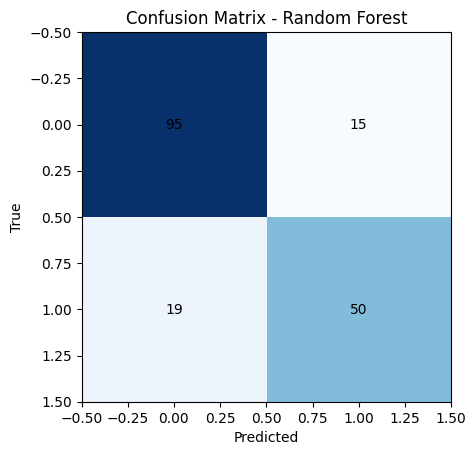

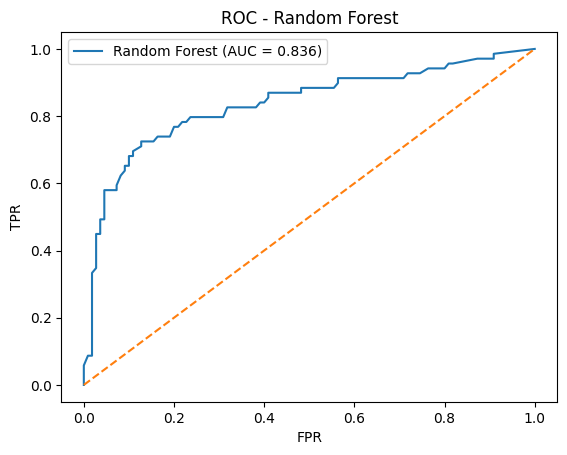

In [11]:
for name, model in models.items():
   y_pred = model.predict(X_test)
   cm = confusion_matrix(y_test, y_pred)

   pl.imshow(cm, cmap="Blues")
   pl.title(f"Confusion Matrix - {name}")
   pl.xlabel("Predicted")
   pl.ylabel("True")
   for (i,j), val in np.ndenumerate(cm):
      pl.text(j, i, val, ha="center", va="center")
   pl.show()
   
   # ROC + AUC
   y_prob = model.predict_proba(X_test)[:,1]
   fpr, tpr, _ = roc_curve(y_test, y_prob)
   model_auc = auc(fpr, tpr)

   pl.plot(fpr, tpr, label=f"{name} (AUC = {model_auc:.3f})")
   pl.plot([0,1],[0,1],'--')
   pl.title(f"ROC - {name}")
   pl.xlabel("FPR")
   pl.ylabel("TPR")
   pl.legend()
   pl.show()

##### Виконайте крос-валідацію для логістичної регресії та дерев рішень. Оптимізуйте гіперпараметри для випадкового лісу, використовуючи GridSearchCV або RandomizedSearchCV.


In [8]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=cv, scoring="f1")
tree_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=cv, scoring="f1")

print("Logistic Regression CV F1:", logreg_scores.mean())
print("Decision Tree CV F1:", tree_scores.mean())

param_dist = {
   "n_estimators": [100,200,500],
   "max_depth": [None, 4,6,8,12],
   "min_samples_split": [2,5,10],
   "min_samples_leaf": [1,2,4]
}

rnd = RandomizedSearchCV(
   RandomForestClassifier(random_state=42),
   param_distributions=param_dist,
   n_iter=20, scoring="f1", cv=cv, n_jobs=-1, random_state=42
)
rnd.fit(X_train, y_train)
print("Best RF params:", rnd.best_params_)

Logistic Regression CV F1: 0.7196301103142544
Decision Tree CV F1: 0.7059606592125243
Best RF params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4}


##### Порівняйте ефективність кожної моделі на основі метрик (точність, precision, recall, F1-score) та виберіть найкращу модель.


In [9]:
df_results = pd.DataFrame(results)
best_accuracy  = df_results.loc[df_results["Accuracy"].idxmax()]
best_precision = df_results.loc[df_results["Precision"].idxmax()]
best_recall    = df_results.loc[df_results["Recall"].idxmax()]
best_f1        = df_results.loc[df_results["F1"].idxmax()]
print("Best Accuracy model:",  best_accuracy["Model"])
print("Best Precision model:", best_precision["Model"])
print("Best Recall model:",    best_recall["Model"])
print("Best F1-score model:",  best_f1["Model"])

Best Accuracy model: Random Forest
Best Precision model: Logistic Regression
Best Recall model: Random Forest
Best F1-score model: Random Forest
